In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return
setup_mpl()

In [3]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

In [4]:
df = pd.read_csv('../data/case1Data.txt')
df.rename(columns={header: header.replace(' ', '') for header in df.columns}, inplace=True)
df.replace(' NaN', np.nan, inplace=True)
df.replace(' NaN ', np.nan, inplace=True)
df.replace('NaN ', np.nan, inplace=True)
df.replace('NaN', np.nan, inplace=True)
for header in df.columns:
    elements = list(df[header])
    status = True
    for val in elements:
        if not isinstance(val, int) and not isinstance(val, float):
            if has_numbers(val) == False:
                status = False
    if status:
        df[header] = df[header].astype('float64') 
df.head()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,C_1,C_2,C_3,C_4,C_5
0,-6.158895,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,...,3.692902,12.826477,-6.889479,3.443535,5.400120,I,NaN,H,J,K
1,-22.200026,-6.370690,7.792366,11.858663,NaN,-15.420530,21.683970,1.057192,2.559764,NaN,...,7.270303,10.039281,-7.678936,-0.189822,0.717526,H,NaN,H,I,I
2,-19.357551,-4.229569,2.756115,12.446836,-17.567113,-12.984783,NaN,2.484515,NaN,1.852533,...,5.889789,14.186614,-9.527944,0.400832,-2.458897,NaN,I,K,J,G
3,28.763803,-10.487072,1.460685,9.307533,-21.306282,-19.824912,NaN,-0.442587,0.743039,-0.376102,...,7.024105,8.871258,-7.514400,-3.448892,-2.612379,K,H,I,I,NaN
4,43.779898,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,...,8.186575,10.532577,-7.509476,NaN,0.754905,H,H,K,J,J


In [5]:
df.columns

Index(['y', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       ...
       'x_91', 'x_92', 'x_93', 'x_94', 'x_95', 'C_1', 'C_2', 'C_3', 'C_4',
       'C_5'],
      dtype='object', length=101)

In [90]:
df.C_1.value_counts(), len(df.C_1), 100 - df.C_1.value_counts().sum()

( J    20
  G    20
  H    18
  K    11
  I    11
 Name: C_1, dtype: int64,
 100,
 20)

In [91]:
df.C_2.value_counts(), len(df.C_2), 100 - df.C_2.value_counts().sum()

( I    54
  H    28
 Name: C_2, dtype: int64,
 100,
 18)

In [92]:
df.C_3.value_counts(), len(df.C_3), 100 - df.C_3.value_counts().sum()

( I    20
  K    18
  H    17
  J    15
  G    10
 Name: C_3, dtype: int64,
 100,
 20)

In [93]:
df.C_4.value_counts(), len(df.C_4), 100 - df.C_4.value_counts().sum()

( I    24
  J    18
  H    17
  K    15
  G    14
 Name: C_4, dtype: int64,
 100,
 12)

In [94]:
df.C_5.value_counts(), len(df.C_5), 100 - df.C_5.value_counts().sum()

( H    23
  K    19
  J    18
  G    16
  I    11
 Name: C_5, dtype: int64,
 100,
 13)

# Chi-square test

In [95]:
df.dtypes

y      float64
x_1    float64
x_2    float64
x_3    float64
x_4    float64
        ...   
C_1     object
C_2     object
C_3     object
C_4     object
C_5     object
Length: 101, dtype: object

In [6]:
# getting categorical variables
df_cat = pd.DataFrame(data = df.dtypes, columns = 
                                         ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
df_cat = df[cat_var]
df_cat.head()

,C_1,C_2,C_3,C_4,C_5
0,I,NaN,H,J,K
1,H,NaN,H,I,I
2,NaN,I,K,J,G
3,K,H,I,I,NaN
4,H,H,K,J,J


In [10]:
pd.crosstab(df['C_1'], df['C_2']).T

C_1,G,H,I,J,K
C_2,,,,,
H,10,4,2,5,3
I,9,9,6,11,7


In [20]:
df[(df.C_1==' H')&(df.C_2==' H')]

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,C_1,C_2,C_3,C_4,C_5
4,43.779898,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,...,8.186575,10.532577,-7.509476,NaN,0.754905,H,H,K,J,J
22,43.810140,-11.010295,1.743390,9.420931,-14.400703,NaN,25.537612,3.498127,7.697403,3.697151,...,8.813248,10.053621,-4.932255,NaN,NaN,H,H,H,G,J
64,35.420900,-12.557371,NaN,7.282246,NaN,-17.409542,21.147511,2.481557,2.670190,0.122570,...,-0.026005,8.095787,-9.136830,0.506049,2.247317,H,H,I,I,J
70,21.620299,-7.421212,4.721454,10.983090,-18.765915,-14.852324,23.680197,4.277369,4.665428,0.794222,...,13.406027,NaN,-6.670676,NaN,-0.398572,H,H,NaN,I,J


In [97]:
from scipy.stats import chi2_contingency
from itertools import combinations

In [98]:
pvals = []
for (var1, var2) in combinations(cat_var, 2):
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[var1], df[var2]))
    pvals.append((var1, var2, p))

In [99]:
k = 10
bonferroni_alpha = 0.05/k
signf = []
chi2_matrix = np.zeros((5,5))
for i in range(chi2_matrix.shape[0]):
    for j in range(chi2_matrix.shape[1]):
        p = chi2_contingency(pd.crosstab(df[cat_var[i]], df[cat_var[j]]))[1]
        chi2_matrix[i,j] = p
        if p < bonferroni_alpha and i != j:
            signf.append((i, j))

In [100]:
signf

[]

In [101]:
import seaborn as sns
from matplotlib.patches import Rectangle

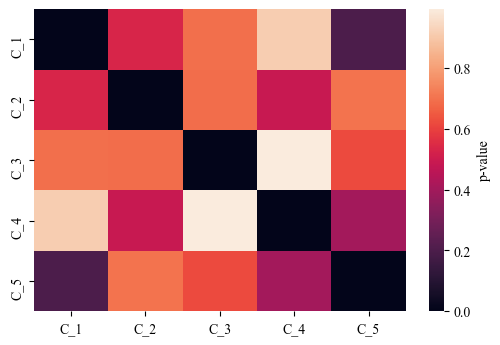

In [102]:
fig, ax = plt.subplots(dpi=100)
sns.heatmap(chi2_matrix, xticklabels=cat_var, yticklabels=cat_var, ax = ax, cbar_kws={'label': 'p-value'})
#ax.add_patch(Rectangle(signf[0], 1, 1, fill=False, edgecolor='blue', lw=3))
plt.savefig('chi2_heatmap.png', dpi=100)
plt.show()

In [103]:
chi2_contingency(pd.crosstab(df[cat_var[0]], df[cat_var[0]]))

(320.0,
 1.8138137089532896e-58,
 16,
 array([[5.    , 4.5   , 2.75  , 5.    , 2.75  ],
        [4.5   , 4.05  , 2.475 , 4.5   , 2.475 ],
        [2.75  , 2.475 , 1.5125, 2.75  , 1.5125],
        [5.    , 4.5   , 2.75  , 5.    , 2.75  ],
        [2.75  , 2.475 , 1.5125, 2.75  , 1.5125]]))

## KNN imputation

In [104]:
df.head()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,C_1,C_2,C_3,C_4,C_5
0,-6.158895,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,...,3.692902,12.826477,-6.889479,3.443535,5.400120,I,NaN,H,J,K
1,-22.200026,-6.370690,7.792366,11.858663,NaN,-15.420530,21.683970,1.057192,2.559764,NaN,...,7.270303,10.039281,-7.678936,-0.189822,0.717526,H,NaN,H,I,I
2,-19.357551,-4.229569,2.756115,12.446836,-17.567113,-12.984783,NaN,2.484515,NaN,1.852533,...,5.889789,14.186614,-9.527944,0.400832,-2.458897,NaN,I,K,J,G
3,28.763803,-10.487072,1.460685,9.307533,-21.306282,-19.824912,NaN,-0.442587,0.743039,-0.376102,...,7.024105,8.871258,-7.514400,-3.448892,-2.612379,K,H,I,I,NaN
4,43.779898,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,...,8.186575,10.532577,-7.509476,NaN,0.754905,H,H,K,J,J


In [105]:
feature_matrix = df.drop('y', axis=1)
response_variable = df['y'].values

In [123]:
feature_matrix.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_91,x_92,x_93,x_94,x_95,C_1,C_2,C_3,C_4,C_5
0,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,NaN,...,3.692902,12.826477,-6.889479,3.443535,5.400120,I,NaN,H,J,K
1,-6.370690,7.792366,11.858663,NaN,-15.420530,21.683970,1.057192,2.559764,NaN,-4.286417,...,7.270303,10.039281,-7.678936,-0.189822,0.717526,H,NaN,H,I,I
2,-4.229569,2.756115,12.446836,-17.567113,-12.984783,NaN,2.484515,NaN,1.852533,NaN,...,5.889789,14.186614,-9.527944,0.400832,-2.458897,NaN,I,K,J,G
3,-10.487072,1.460685,9.307533,-21.306282,-19.824912,NaN,-0.442587,0.743039,-0.376102,-7.535363,...,7.024105,8.871258,-7.514400,-3.448892,-2.612379,K,H,I,I,NaN
4,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,NaN,...,8.186575,10.532577,-7.509476,NaN,0.754905,H,H,K,J,J


In [124]:
from sklearn.preprocessing import LabelEncoder

In [129]:
cat_vars = ['C_1', 'C_2', 'C_3', 'C_4', 'C_5']

feature_matrix_label_enc = feature_matrix[cat_vars].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index ))

In [126]:
feature_matrix_label_enc.head()

,C_1,C_2,C_3,C_4,C_5
0,2.0,NaN,1.0,3.0,4.0
1,1.0,NaN,1.0,2.0,2.0
2,NaN,1.0,4.0,3.0,0.0
3,4.0,0.0,2.0,2.0,NaN
4,1.0,0.0,4.0,3.0,3.0


In [130]:
feature_matrix.drop(cat_vars, axis=1).head(), feature_matrix_label_enc.head()

(         x_1       x_2        x_3        x_4        x_5        x_6       x_7  \
 0  -7.518161  5.423677  11.810360 -19.076321  -7.018273  23.841339  1.050206   
 1  -6.370690  7.792366  11.858663        NaN -15.420530  21.683970  1.057192   
 2  -4.229569  2.756115  12.446836 -17.567113 -12.984783        NaN  2.484515   
 3 -10.487072  1.460685   9.307533 -21.306282 -19.824912        NaN -0.442587   
 4 -13.066517  4.812794  10.641948 -17.691825        NaN  19.057921  1.900578   
 
         x_8       x_9      x_10  ...      x_86      x_87      x_88       x_89  \
 0  3.132453  4.403462       NaN  ... -2.590210 -1.943897  3.011972 -31.614019   
 1  2.559764       NaN -4.286417  ... -3.573072 -1.583166       NaN -28.880360   
 2       NaN  1.852533       NaN  ... -4.023667  2.648645  4.067629 -32.769482   
 3  0.743039 -0.376102 -7.535363  ... -4.987491  3.992532  3.954274 -35.846878   
 4  6.133609 -0.771247       NaN  ... -4.021144  3.152862  3.366474        NaN   
 
         x_90     

In [131]:
real_feature_matrix = feature_matrix.drop(cat_vars, axis=1)

In [136]:
X = np.hstack((real_feature_matrix.values, feature_matrix_label_enc.values))

In [137]:
np.savetxt('feature_matrix_test.txt', X)
np.savetxt('response_variable_test.txt', response_variable)

TODO: clean up

In [111]:
from sklearn.preprocessing import OneHotEncoder

In [116]:
cat_vars = [95, 97, 98, 99]
X_cat = vals[:, cat_vars]
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_cat)
X_cat_encoded = enc.transform(X_cat)
X_encoded = np.delete(vals, cat_vars, axis=1)
X_encoded = np.hstack((X_encoded, X_cat_encoded.toarray()))

In [117]:
X_encoded

array([[47., 45., 27., ...,  0.,  1.,  0.],
       [61., 71., 28., ...,  0.,  0.,  0.],
       [81., 12., 40., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  5.,  5., ...,  0.,  1.,  0.],
       [52.,  9., 33., ...,  0.,  0.,  1.],
       [24., 19., 38., ...,  1.,  0.,  0.]])

In [114]:
vals.shape

(100, 100)